# Lets Play Cricket - IPL Exploration Analysis

An data analysis exploration for Cricket fans!

# 1. Data Understanding

![](https://matchday.in/wp-content/uploads/2020/09/Dream-11-IPL-2020-schedule-announced.jpg)

In [2]:
# Our imports
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# ball by ball data
delivery_data = pd.read_csv('D:\\Data Science\\IPL Ball-by-Ball 2008-2020.csv') 

# IPL Match Data from 2008 and 2020.
match_data = pd.read_csv('D:\\Data Science\\IPL Matches 2008-2020.csv')

In [4]:
delivery_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
match_data.head()

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


### Let's show some Stats

In [6]:
biggest_win = match_data['result_margin'].max()
print("Biggest Win Margin was " + str(biggest_win) + " runs.")

teams_biggest_win = []

Biggest Win Margin was 146.0 runs.


In [7]:
# Which game was this biggest win?
f = match_data.loc[match_data['result_margin'] == biggest_win]
f

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
620,1082635,Delhi,5/6/2017,2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan


In [8]:
teams_biggest_win.append((str(f['season'].tolist()[0])))
teams_biggest_win.append((str(f['venue'].tolist()[0])))
teams_biggest_win.append(str(f['team1'].tolist()[0]))
teams_biggest_win.append(str(f['team2'].tolist()[0]))
teams_biggest_win.append(str(f['winner'].tolist()[0]))
teams_biggest_win

['2017',
 'Feroz Shah Kotla',
 'Delhi Daredevils',
 'Mumbai Indians',
 'Mumbai Indians']

In [9]:
tie_matches_no = match_data.loc[match_data['result']=='tie']
tie_matches_no

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
66,392190,Cape Town,4/23/2009,2009,YK Pathan,Newlands,1,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,Y,NaN,MR Benson,M Erasmus
130,419121,Chennai,3/21/2010,2010,J Theron,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,Y,NaN,K Hariharan,DJ Harper
328,598004,Hyderabad,4/7/2013,2013,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,Y,NaN,AK Chaudhary,S Ravi
341,598017,Bangalore,4/16/2013,2013,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,M Erasmus,VA Kulkarni
416,729315,Abu Dhabi,4/29/2014,2014,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
476,829741,Ahmedabad,4/21/2015,2015,SE Marsh,"Sardar Patel Stadium, Motera",0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,Y,NaN,M Erasmus,S Ravi
610,1082625,Rajkot,4/29/2017,2017,KH Pandya,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,Delhi,3/30/2019,2019,PP Shaw,Feroz Shah Kotla,0,Delhi Capitals,Kolkata Knight Riders,Delhi Capitals,field,Delhi Capitals,tie,NaN,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,Mumbai,5/2/2019,2019,JJ Bumrah,Wankhede Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,Y,NaN,CK Nandan,S Ravi
757,1216493,Dubai,9/20/2020,2020,MP Stoinis,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,Y,NaN,AK Chaudhary,Nitin Menon


### The Most Popular Venues in the IPL from 2008 to 2020

In [11]:
match_data['venue'].value_counts().sort_values(ascending=False)

Eden Gardens                                            77
Feroz Shah Kotla                                        74
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   65
Rajiv Gandhi International Stadium, Uppal               64
MA Chidambaram Stadium, Chepauk                         57
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Dubai International Cricket Stadium                     33
Sheikh Zayed Stadium                                    29
Punjab Cricket Association IS Bindra Stadium, Mohali    21
Maharashtra Cricket Association Stadium                 21
Sharjah Cricket Stadium                                 18
Subrata Roy Sahara Stadium                              17
Dr DY Patil Sports Academy                              17
Kingsmead                                               15
M.Chinnaswamy Stadium                                   

C:\Users\RAJAN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


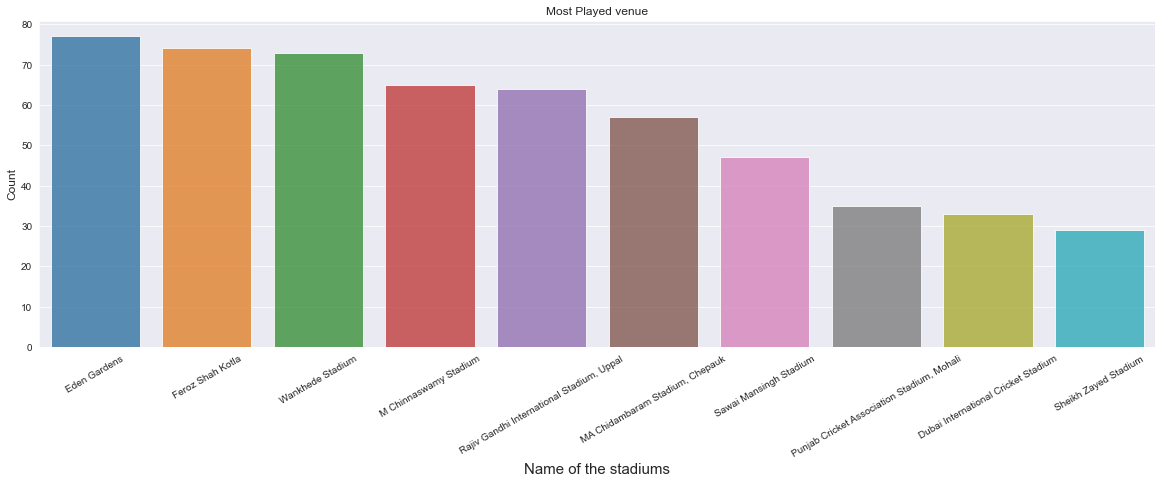

In [12]:
sns.set_style("darkgrid")# to make background with grid
ls=match_data['venue'].value_counts().sort_values(ascending=False)
ls=ls[:10]
plt.figure(figsize=(20,6))
Most_Played =sns.barplot(ls.index, ls.values, alpha=0.8)

plt.title('Most Played venue')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the stadiums', fontsize=15)
Most_Played.set_xticklabels(rotation=30,labels=ls.index,fontsize=10)
plt.show()


This shows **Eden Gardens** has hosted most matches in the History of IPL

# 2. Visualizations - Match Statistics
## Player with the most 'Man of the Matches' across 13 Seasons

In [13]:
match_data['player_of_match'].value_counts().head(10)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
YK Pathan         16
SR Watson         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

C:\Users\RAJAN\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


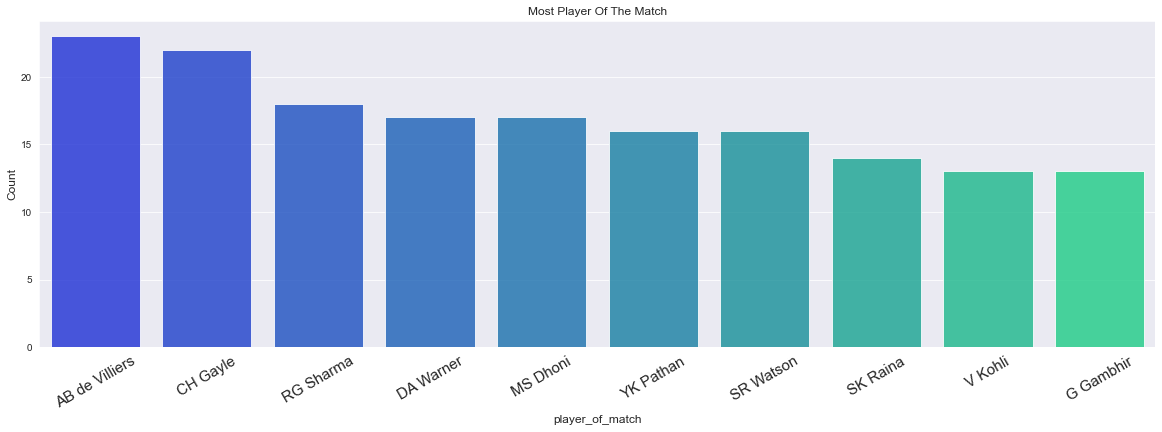

In [14]:
man_of_match = match_data['player_of_match'].value_counts()
man_of_match = man_of_match[:10]
sns.set_style("darkgrid")
plt.figure(figsize=(20,6))
man_of_matches = sns.barplot(man_of_match.index, man_of_match.values, alpha=0.8,palette='winter')
plt.title('Most Player Of The Match')
plt.ylabel('Count', fontsize=12)
plt.xlabel('player_of_match', fontsize=12)
man_of_matches.set_xticklabels(rotation=30,labels=man_of_match.index,fontsize=15)
plt.show()

**AB de Villiers** has recived most man of the matches from 2008 to 2017

# Matches Played across each season

Text(0.5, 0, 'Season')

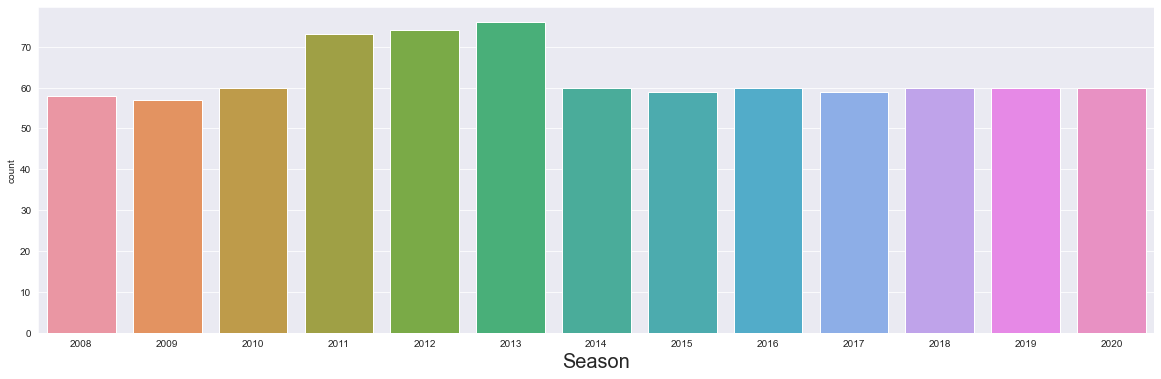

In [15]:
plt.figure(figsize=(20,6))
season=sns.countplot(x='season',data=match_data)
plt.xlabel('Season',fontsize=20)

This Shows Most Matches were played in the **2013** Season

# Most Favourite Umpires

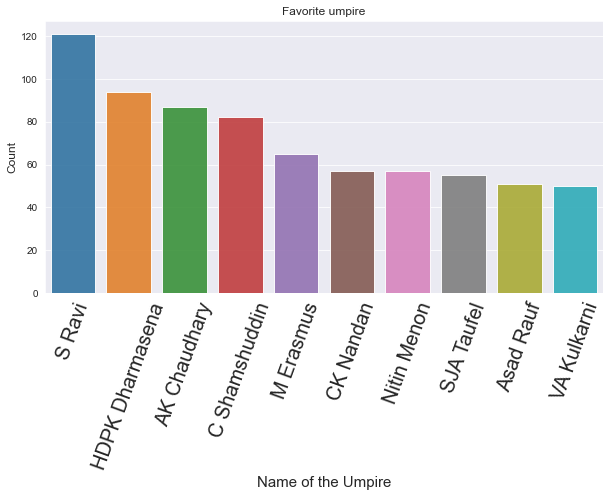

In [16]:
ump=pd.concat([match_data['umpire1'],match_data['umpire2']]).value_counts().sort_values(ascending=False)
ump=ump[:10]
plt.figure(figsize=(10,5))
Most_umpired =sns.barplot(x=ump.index, y=ump.values, alpha=0.9)

plt.title('Favorite umpire')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Name of the Umpire', fontsize=15)
Most_umpired.set_xticklabels(rotation=70,labels=ump.index,fontsize=20)
plt.show()




This shows that **S Ravi** and **Dharamsena**  were the favourite Umpires.


# 3.  A Deep Analysis of the Games in 2020

Is **Toss Winner** Also the Match Winner? For the year 2020

In [24]:
len(match_data[match_data['season']==2020])

60

In [26]:
match_2020 = match_data[match_data['season'] == 2020]
print(len(match_2020[match_2020['toss_winner'] == match_2020['winner']]))
match_2020[match_2020['toss_winner'] == match_2020['winner']].head()

25


,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
756,1216492,Abu Dhabi,9/19/2020,2020,AT Rayudu,Sheikh Zayed Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,NaN,CB Gaffaney,VK Sharma
759,1216495,Sharjah,11/3/2020,2020,S Nadeem,Sharjah Cricket Stadium,0,Mumbai Indians,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,C Shamshuddin,RK Illingworth
763,1216499,Abu Dhabi,10/28/2020,2020,SA Yadav,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,5.0,N,NaN,UV Gandhe,CB Gaffaney
765,1216501,Abu Dhabi,10/7/2020,2020,RA Tripathi,Sheikh Zayed Stadium,0,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,10.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth
766,1216502,Sharjah,10/31/2020,2020,Sandeep Sharma,Sharjah Cricket Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,5.0,N,NaN,KN Ananthapadmanabhan,K Srinivasan


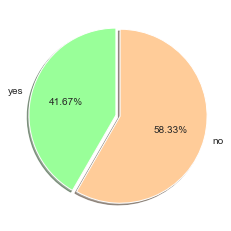

In [28]:
match_2020 = match_data[match_data['season'] == 2020]
df = match_2020[match_2020['toss_winner'] == match_2020['winner']]

# because total of 60 matches were played in 2016
slices = [len(df), (60-len(df))] 
labels = ['yes','no']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.2f%%',colors=['#99ff99','#ffcc99'])
plt.show()

**NO**, In 2020 if a team won the **toss** they had slightly lesser chances to win the match

Trends in 2020 after **winning the toss**.

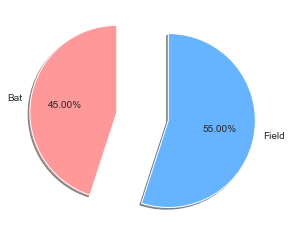

In [29]:
dfs = match_data[(match_data['toss_decision']=='field') & (match_data['season']==2020) ]
labels=['Bat','Field']
slices=[60-len(dfs),len(dfs)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

Teams winning toss in 2020 majorly decide to **Field** first.

## Why do sides choose to field first?

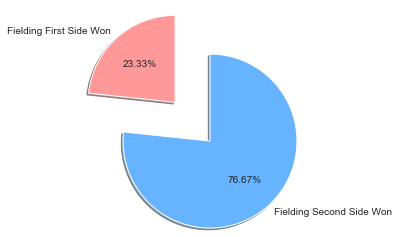

In [31]:
dfd = match_2020[(match_2020['toss_decision']=='field') & (match_2020['toss_winner']==match_2020['winner'])]
labels=['Fielding First Side Won','Fielding Second Side Won']
slices=[len(dfd),60-len(dfd)]
plt.pie(slices,labels=labels,startangle=90,shadow=1,explode=(0.2,0.4),autopct='%1.2f%%',colors=['#ff9999','#66b3ff'])
plt.show()

Sides Fielding First Side Won More Matches in 2020

# Team Comparisons

In [32]:
match_data.head()

,id,city,date,season,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,4/18/2008,2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,4/19/2008,2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,4/19/2008,2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,4/20/2008,2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,4/20/2008,2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [33]:
def comparator(team1):
    # you can take team2 here also
    teams=list(match_data.team1.unique()) 

    # Remove team1
    teams.remove(team1)

    #make a list if all oppenents
    opponents=teams.copy()

    # Collect data from match data where team one played (they can be in either team1 or team2 columns)
    mt1=match_data[((match_data['team1']==team1)|(match_data['team2']==team1))]

    for t in opponents:
        # each time comparing each opponent team and the team we are looking for
        mask = (((mt1['team1']==t)|(mt1['team2']==t)))&((mt1['team1']==team1)|(mt1['team2']==team1))
        # to_frame to convert to DataFrame and T is used to Transpose
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)


In [34]:
comparator('Mumbai Indians')

        Mumbai Indians  Royal Challengers Bangalore
winner              17                           10
        Mumbai Indians  Kings XI Punjab
winner              14               12
        Mumbai Indians  Delhi Daredevils
winner              11                11
        Mumbai Indians  Kolkata Knight Riders
winner              21                      6
        Rajasthan Royals  Mumbai Indians
winner                11              11
        Mumbai Indians  Deccan Chargers
winner               6                4
        Mumbai Indians  Chennai Super Kings
winner              18                   12
        Kochi Tuskers Kerala
winner                     1
        Mumbai Indians  Pune Warriors
winner               5              1
        Sunrisers Hyderabad  Mumbai Indians
winner                    8               8
        Mumbai Indians  Gujarat Lions
winner               2              2
        Mumbai Indians  Rising Pune Supergiants
winner               1                        

In [35]:
comparator("Kolkata Knight Riders")

        Kolkata Knight Riders  Royal Challengers Bangalore
winner                     14                           12
        Kolkata Knight Riders  Kings XI Punjab
winner                     18                9
        Kolkata Knight Riders  Delhi Daredevils
winner                     13                 8
        Mumbai Indians  Kolkata Knight Riders
winner              21                      6
        Kolkata Knight Riders  Rajasthan Royals
winner                     12                10
        Kolkata Knight Riders  Deccan Chargers
winner                      7                2
        Chennai Super Kings  Kolkata Knight Riders
winner                   14                      8
        Kochi Tuskers Kerala
winner                     2
        Kolkata Knight Riders  Pune Warriors
winner                      4              1
        Kolkata Knight Riders  Sunrisers Hyderabad
winner                     12                    7
        Gujarat Lions  Kolkata Knight Riders
winner       